In [1]:
import pandas as pd

DATA = '/kaggle/input/nasdaq-analysis/nasdq.csv'
df = pd.read_csv(filepath_or_buffer=DATA, parse_dates=['Date'])
df['year'] = df['Date'].dt.year
df.head()

,Date,Open,High,Low,Close,Volume,InterestRate,ExchangeRate,VIX,TEDSpread,EFFR,Gold,Oil,year
0,2010-01-04,6.640000,6.810000,6.633333,6.746667,6514500.0,0.11,1.4419,20.04,0.17,0.12,1117.699951,81.510002,2010
1,2010-01-05,6.643333,6.773333,6.643333,6.766667,4445100.0,0.11,1.4402,19.35,0.18,0.12,1118.099976,81.769997,2010
2,2010-01-06,6.733333,6.786667,6.720000,6.763333,7340100.0,0.11,1.4404,19.16,0.19,0.12,1135.900024,83.180000,2010
3,2010-01-07,6.750000,6.766667,6.630000,6.673333,8498400.0,0.11,1.4314,19.06,0.20,0.10,1133.099976,82.660004,2010
4,2010-01-08,6.676667,6.766667,6.626667,6.743333,4347600.0,0.11,1.4357,18.13,0.20,0.11,1138.199951,82.750000,2010


<Axes: xlabel='Date', ylabel='Close'>

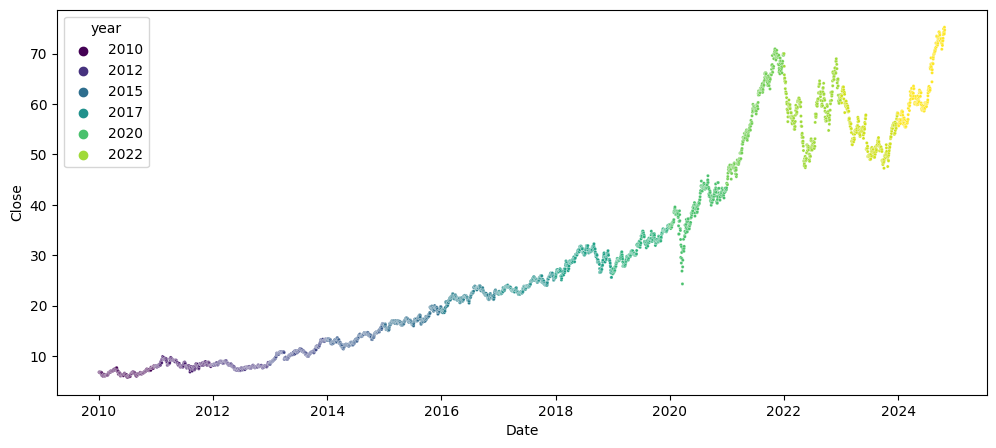

In [2]:
import matplotlib.pyplot as plt
from seaborn import scatterplot

FIGSIZE = (12, 5)
plt.figure(figsize=FIGSIZE)
scatterplot(data=df, x='Date', y='Close', hue='year', palette='viridis', s=5)

What do we see? It looks like two very different price regimes: a steady climb up for ten years and then four years of volatility.

<Axes: xlabel='Close', ylabel='Volume'>

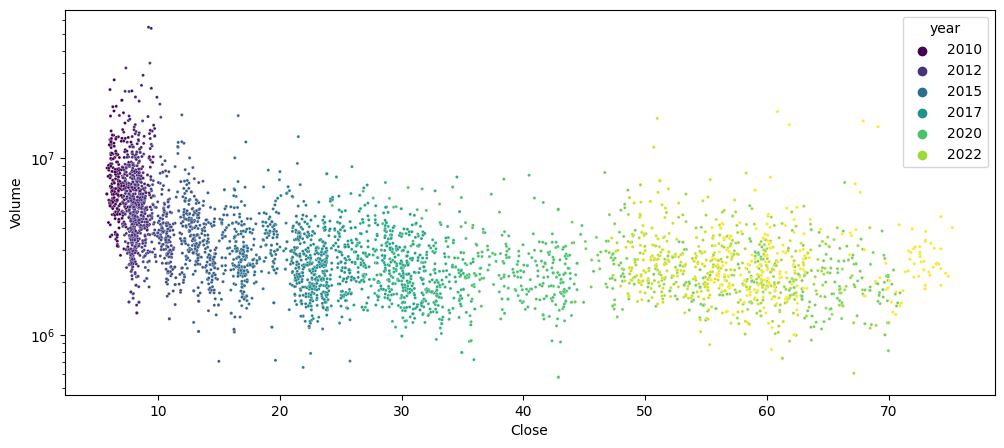

In [3]:
plt.figure(figsize=FIGSIZE)
plt.yscale(value='log')
scatterplot(data=df, x='Close', y='Volume', hue='year', palette='viridis', s=5)

If we plot the volume against the price a few big outliers make the volume look almost constant; if we plot the log of the volume we still see some pretty big outliers, but we see a more nuanced story. From the hue we definitely see price retrenchment since 2020. And we see that volume generally has declined as prices have risen.

Let's look at some other quotes; we should expect to see whatever happened in 2020 show up in these plots too. Hint: it was COVID.

<Axes: xlabel='Date', ylabel='InterestRate'>

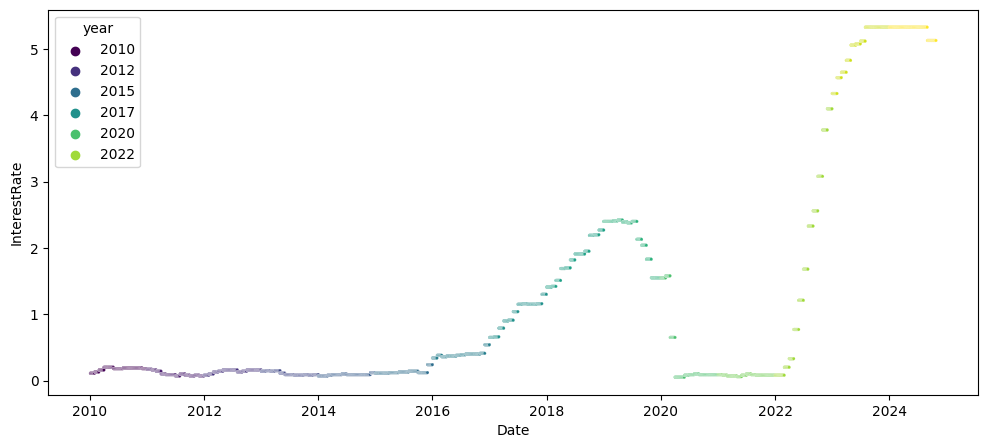

In [4]:
plt.figure(figsize=FIGSIZE)
scatterplot(data=df, x='Date', hue='year', palette='viridis', s=5, y='InterestRate')

Here we can see that interest rates were rising prior to the pandemic, due to changes in monetary policy that might have been political or that might have been related to the post-2008 crisis recovery. Then in 2020 rates go to zero again and recover in 2022 in an attempt to respond to inflation.

<Axes: xlabel='Date', ylabel='ExchangeRate'>

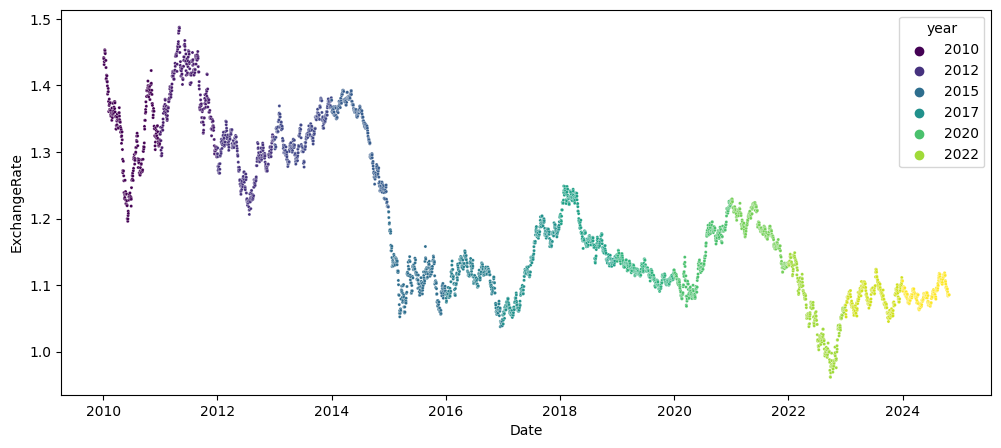

In [5]:
plt.figure(figsize=FIGSIZE)
scatterplot(data=df, x='Date', hue='year', palette='viridis', s=5, y='ExchangeRate')

It's not clear which exchange rate this is. It is probably USD vs something, but what? CAD? EUR? GBP? hard to say.

<Axes: xlabel='Date', ylabel='VIX'>

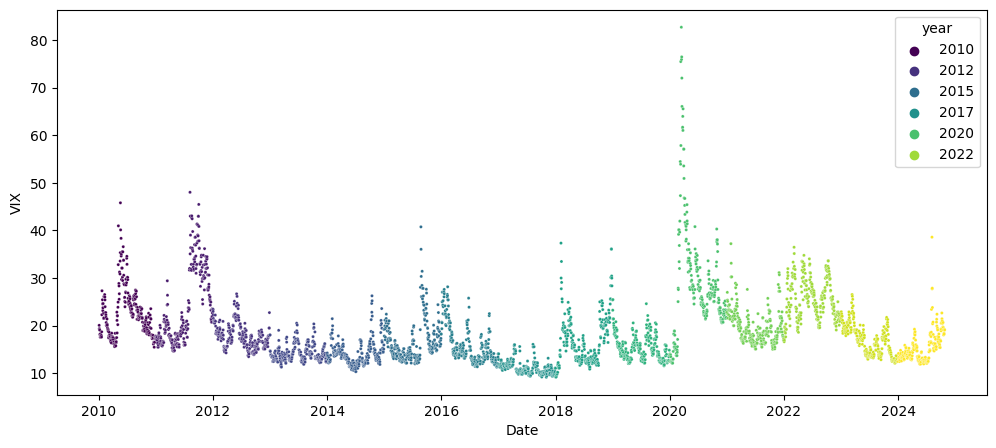

In [6]:
plt.figure(figsize=FIGSIZE)
scatterplot(data=df, x='Date', hue='year', palette='viridis', s=5, y='VIX')

VIX is interesting because it is almost always reactive, as we can see in this graph, by the its tendencey to spike and then recede, over and over. How anyone makese money trading VIX I can't imagine.

<Axes: xlabel='Date', ylabel='TEDSpread'>

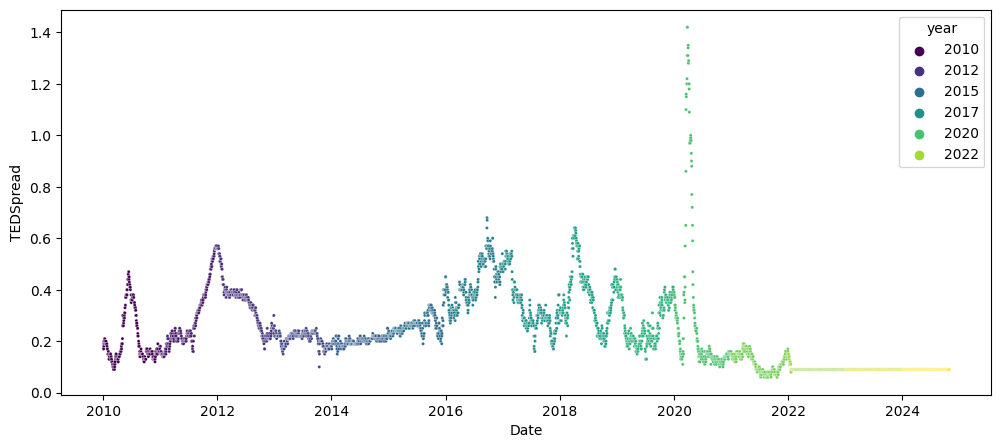

In [7]:
plt.figure(figsize=FIGSIZE)
scatterplot(data=df, x='Date', hue='year', palette='viridis', s=5, y='TEDSpread')

The TED spread captures the premium investors want for taking credit risk. That post-2022 tail looks suspicious; a cursory web search suggests that the TED spread has been discontinued, probably as a result of LIBOR being sunset as a market indicator.

<Axes: xlabel='Date', ylabel='Gold'>

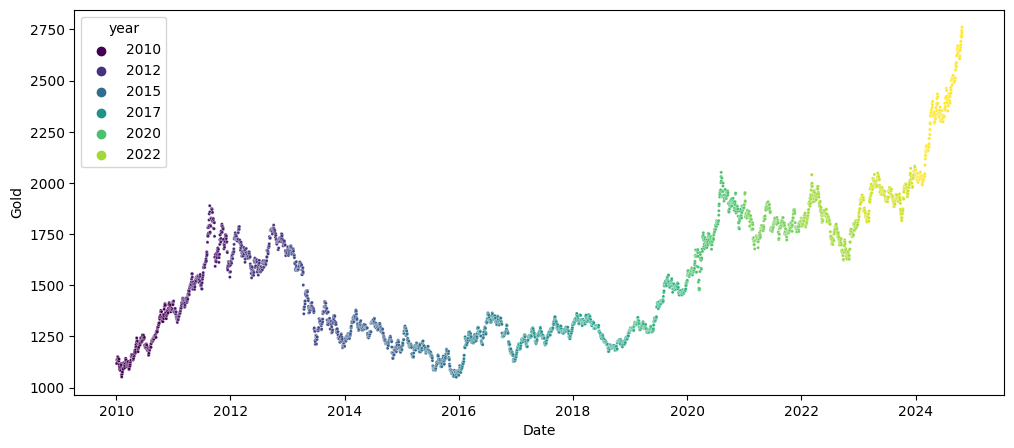

In [8]:
plt.figure(figsize=FIGSIZE)
scatterplot(data=df, x='Date', hue='year', palette='viridis', s=5, y='Gold')

Gold, as a commodity, should be a hedge against currency inflation, as its price rises with inflation and tends to sink as inflation subsides. I have long thought that it would be interesting to scale stock returns by the price of gold to estimate stock returns on an inflation-adjusted basis.

<Axes: xlabel='Date', ylabel='Oil'>

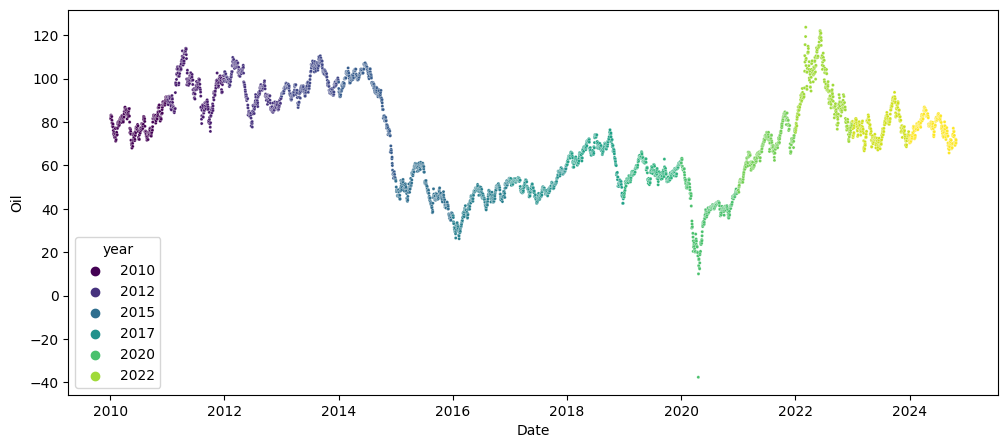

In [9]:
plt.figure(figsize=FIGSIZE)
scatterplot(data=df, x='Date', hue='year', palette='viridis', s=5, y='Oil')

There was a time when oil would have served the same purpose, but oil prices have been weird for a long time. I mean look at how oil prices spike down at the beginning of the pandemic and rise steadily during the pandemic.

<Axes: xlabel='Date', ylabel='gold/oil'>

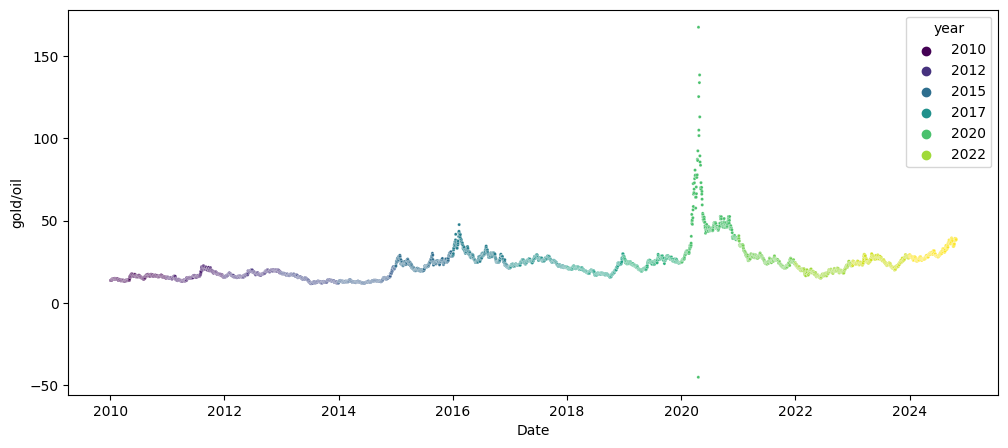

In [10]:
oil_df = df[['Date', 'Gold', 'Oil', 'year']].copy()
oil_df['gold/oil'] = oil_df['Gold']/oil_df['Oil']

plt.figure(figsize=FIGSIZE)
scatterplot(data=oil_df, x='Date', hue='year', palette='viridis', s=5, y='gold/oil')

Oddly though when we do the math the price of gold in terms of oil seems pretty steady most of the time, although the prices really decoupled during the pandemic, which is the time we would need/want a hedge the most.

In [11]:
oil_df[['Gold', 'Oil']].corr()

,Gold,Oil
Gold,1.000000,0.216763
Oil,0.216763,1.000000


The price levels seem pretty steady, but the daily change ratios are not.

<Axes: xlabel='Date', ylabel='gold/close'>

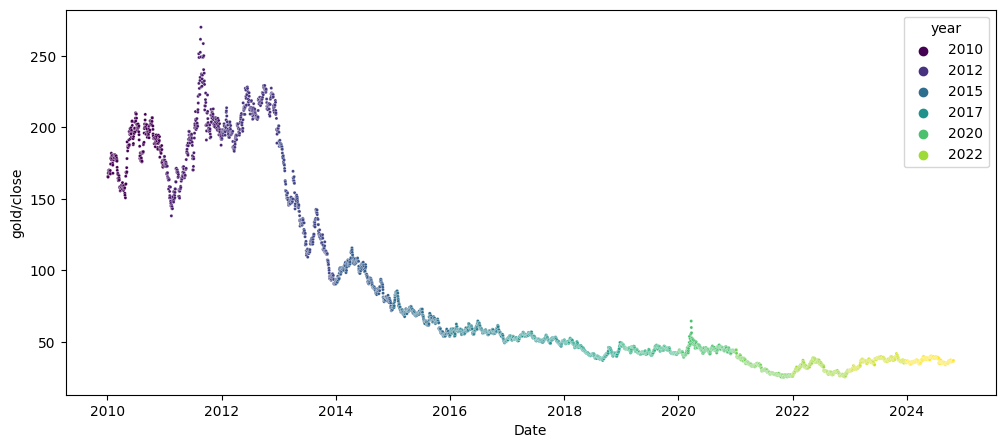

In [12]:
close_df = df[['Date', 'Gold', 'Close', 'year']].copy()
close_df['gold/close'] = close_df['Gold']/close_df['Close']

plt.figure(figsize=FIGSIZE)
scatterplot(data=close_df, x='Date', hue='year', palette='viridis', s=5, y='gold/close')

Wow. Over the period of interest, gold has lost about three quarters of its value measured in NASDAQ shares. And on this scale the 2020 pandemic is barely a blip. This is not what I would have guessed at all.

In [13]:
df[['Close', 'Gold']].corr()

,Close,Gold
Close,1.000000,0.713888
Gold,0.713888,1.000000


Here the Pearson correlation mostly reflects the long period of relative stability. Is this what we would really want from an inflation hedge?